# Analysis of Airbnb Listings in Newyork from 2008 - 2015

Airbnb is an organization that provides a platform for people with rental properties to showcase them for renting based on periods.

The dataset can be sourced from: https://github.com/lebrancconvas/Personal-Saved-Datasets/blob/master/Tableau-Sample-Data/Public%20Data/Airbnb%20Listings%20in%20New%20York%20City.xlsx


Problems identified:

1. What factors affect pricing in property listings in Newyork?
2.  How has the market size grown from 2008-2015 for short term rentals in Newyork?
3. What is the cause for properties having no listings?



This notebook strives to answer the following questions:

1. How many listings are there in Newyork and how has it grown over time?
  * Which year had the highest and lowest increment in new host?
  * Which year had the highest number of ratings and score rating?
2. What is the trend of the number of listings for a host since they started hosting?
3. What's the average number of properties by neighborhood owned by a host?
4. Which neighborhood has the highest number of listings in Newyork?
5. Which are top earning neighborhoods grouped by type and the amount they're going for?
6. What are the average pricing per night based on the type and neighborhood?
7. What listings are popular based on type of property types and type of rooms?
8. What influences the review scores? (price, neighborhood, type of room, type of property)
9. What are the most popular properties based on reviews and score rating





Step 1: Import modules and libaries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# !pip install ydata-profiling >> /dev/null
from ydata_profiling import ProfileReport

Step 2: Loading and inspecting dataset

In [4]:
airbnb_df = pd.read_csv('datasets/airbnb_price_list_newyork.csv')
df = airbnb_df.copy()
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [5]:
df.shape

(30478, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

In [7]:
df.describe(include='all')

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,3.047800e+04,30475,30478,30478,30475,22155.000000,30478,30344.000000,30393.000000,30478.0,30478.000000,30478,22155.000000
unique,NaN,2240,29416,5,19,NaN,3,NaN,NaN,NaN,NaN,511,NaN
top,NaN,2/10/2014,Charming West Village studio,Manhattan,Apartment,NaN,Entire home/apt,NaN,NaN,NaN,NaN,150,NaN
freq,NaN,70,15,16033,27102,NaN,17024,NaN,NaN,NaN,NaN,1481,NaN
mean,1.273171e+07,NaN,NaN,NaN,NaN,90.738659,NaN,10584.854831,1.530089,1.0,12.018735,NaN,91.993230
std,1.190270e+07,NaN,NaN,NaN,NaN,9.059519,NaN,921.299397,1.015359,0.0,21.980703,NaN,8.850373
min,5.000000e+02,NaN,NaN,NaN,NaN,20.000000,NaN,1003.000000,0.000000,1.0,0.000000,NaN,20.000000
25%,2.701298e+06,NaN,NaN,NaN,NaN,85.000000,NaN,10017.000000,1.000000,1.0,0.000000,NaN,89.000000
50%,8.551693e+06,NaN,NaN,NaN,NaN,90.000000,NaN,10065.000000,1.000000,1.0,3.000000,NaN,94.000000
75%,2.120617e+07,NaN,NaN,NaN,NaN,100.000000,NaN,11216.000000,2.000000,1.0,13.000000,NaN,100.000000


## Step 3: Cleanding the dataset

In [8]:
#rename the columns
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

In [9]:
#Drop unnecessary columns
df.drop(columns=['review_scores_rating_(bin)', 'number_of_records'], inplace=True)
df.head()

,host_id,host_since,name,neighbourhood,property_type,room_type,zipcode,beds,number_of_reviews,price,review_scores_rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,Entire home/apt,11249.0,1.0,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,Private room,11206.0,1.0,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,Private room,10032.0,1.0,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,Entire home/apt,10024.0,3.0,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,Private room,10036.0,3.0,39,549,96.0


In [10]:
#Check for missing values
df.isnull().sum()

host_id                    0
host_since                 3
name                       0
neighbourhood              0
property_type              3
room_type                  0
zipcode                  134
beds                      85
number_of_reviews          0
price                      0
review_scores_rating    8323
dtype: int64

In [11]:
#fill in the host since missing values
df['host_since'] = df.host_since.fillna('8/31/2015')
#df['host_since'] = df['host_since'].fillna(method='bfill')

In [12]:
property_type_mode = df.property_type.mode()[0]
df.property_type = df.property_type.fillna(property_type_mode)

In [13]:
#Remove zipcode column
df.drop(columns='zipcode', inplace=True)

In [14]:
#Fill in missing bed values based on the mean per neighboourhood. For each neighbourhood the mean when rounding off comes to 2
bed_grouping_mean = df.groupby(['neighbourhood'])['beds'].mean().round()[0]

df.beds = df.beds.fillna(bed_grouping_mean)

/tmp/ipykernel_10975/1222655437.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bed_grouping_mean = df.groupby(['neighbourhood'])['beds'].mean().round()[0]


In [15]:
score_rating_grouping_mean = df.groupby(['property_type'])['review_scores_rating'].mean()
score_rating_grouping_mean

property_type
Apartment           92.050565
Bed & Breakfast     90.544118
Boat                94.833333
Bungalow            91.333333
Cabin               86.500000
Camper/RV           81.166667
Castle             100.000000
Chalet              99.000000
Condominium         92.708333
Dorm                84.500000
House               90.883258
Hut                 94.000000
Lighthouse         100.000000
Loft                93.507614
Other               89.607143
Tent                      NaN
Townhouse           93.807229
Treehouse           88.333333
Villa               91.833333
Name: review_scores_rating, dtype: float64

In [16]:
df[df['review_scores_rating'].isna()].groupby(['property_type']).size().reset_index()

,property_type,0
0,Apartment,7447
1,Bed & Breakfast,44
2,Boat,2
3,Bungalow,1
4,Camper/RV,1
5,Condominium,46
6,Dorm,9
7,House,531
8,Hut,1
9,Loft,162


In [17]:
#Fill in missing values for review score ratings based on property type means
df['review_scores_rating'] = df.groupby('property_type')['review_scores_rating'].transform(lambda x: x.fillna(x.mean()))

In [18]:
#Fill in missing values for remaining null value based on overall mean
df.loc[df['review_scores_rating'].isnull(),'review_scores_rating'] = df.review_scores_rating.mean()

In [19]:
df[df['review_scores_rating'].isnull()]

,host_id,host_since,name,neighbourhood,property_type,room_type,beds,number_of_reviews,price,review_scores_rating


In [20]:
df.describe()

,host_id,beds,number_of_reviews,review_scores_rating
count,3.047800e+04,30478.000000,30478.000000,30478.000000
mean,1.273171e+07,1.531400,12.018735,91.994136
std,1.190270e+07,1.014245,21.980703,7.550311
min,5.000000e+02,0.000000,0.000000,20.000000
25%,2.701298e+06,1.000000,0.000000,90.000000
50%,8.551693e+06,1.000000,3.000000,92.050565
75%,2.120617e+07,2.000000,13.000000,97.000000
max,4.303307e+07,16.000000,257.000000,100.000000


In [52]:
# changing host_since dtype so that we can use it for correlation step
df['host_since'] = pd.to_datetime(df['host_since'])

In [53]:
df['host_since'].dtype

dtype('<M8[ns]')

In [54]:
# checking for max and min date
max_date = df.iloc[-1]
max_date.host_since

Timestamp('2015-08-31 00:00:00')

In [55]:
# getting the duration of the listings
date_difference =df.host_since.apply( lambda x:  max_date.host_since - x)
date_difference.reset_index()

,index,host_since
0,0,0 days
1,1,0 days
2,2,0 days
3,3,2622 days
4,4,2622 days
...,...,...
30473,30473,0 days
30474,30474,0 days
30475,30475,0 days
30476,30476,0 days


In [56]:
# create a new column to hold the date_difference values
df['date_difference'] = date_difference

In [57]:
df.head()

,host_id,host_since,name,neighbourhood,property_type,room_type,beds,number_of_reviews,price,review_scores_rating,date_difference
0,5162530,2015-08-31,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,Entire home/apt,1.0,0,145,92.050565,0 days
1,33134899,2015-08-31,"Sunny, Private room in Bushwick",Brooklyn,Apartment,Private room,1.0,1,37,92.050565,0 days
2,39608626,2015-08-31,Sunny Room in Harlem,Manhattan,Apartment,Private room,1.0,1,28,92.050565,0 days
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,Entire home/apt,3.0,0,199,92.050565,2622 days
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,Private room,3.0,39,549,96.000000,2622 days


## Step 4: Deriving insights

In [51]:
df.head()

,host_id,host_since,name,neighbourhood,property_type,room_type,beds,number_of_reviews,price,review_scores_rating
0,5162530,2015-08-31,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,Entire home/apt,1.0,0,145,92.050565
1,33134899,2015-08-31,"Sunny, Private room in Bushwick",Brooklyn,Apartment,Private room,1.0,1,37,92.050565
2,39608626,2015-08-31,Sunny Room in Harlem,Manhattan,Apartment,Private room,1.0,1,28,92.050565
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,Entire home/apt,3.0,0,199,92.050565
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,Private room,3.0,39,549,96.000000


# What factors affect pricing in property listings in Newyork?

## Encoding the categorical columns

In [60]:
# instantiate labelencoder object
le = LabelEncoder()

categorical_cols = ['host_since', 'name', 'neighbourhood', 'property_type', 'room_type']

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [61]:
df.head()

,host_id,host_since,name,neighbourhood,property_type,room_type,beds,number_of_reviews,price,review_scores_rating,date_difference
0,5162530,2239,509,1,0,0,1.0,0,145,92.050565,0 days
1,33134899,2239,26479,1,0,1,1.0,1,37,92.050565,0 days
2,39608626,2239,26084,2,0,1,1.0,1,28,92.050565,0 days
3,500,0,12680,2,0,0,3.0,0,199,92.050565,2622 days
4,500,0,27309,2,0,1,3.0,39,549,96.000000,2622 days


## Correlation matrix

In [74]:
# removing , in the values in price column
df['price'] = df['price'].str.replace(',', '') 

In [75]:
#changing price dtype to int
df['price'].astype('int64')

0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: price, Length: 30478, dtype: int64

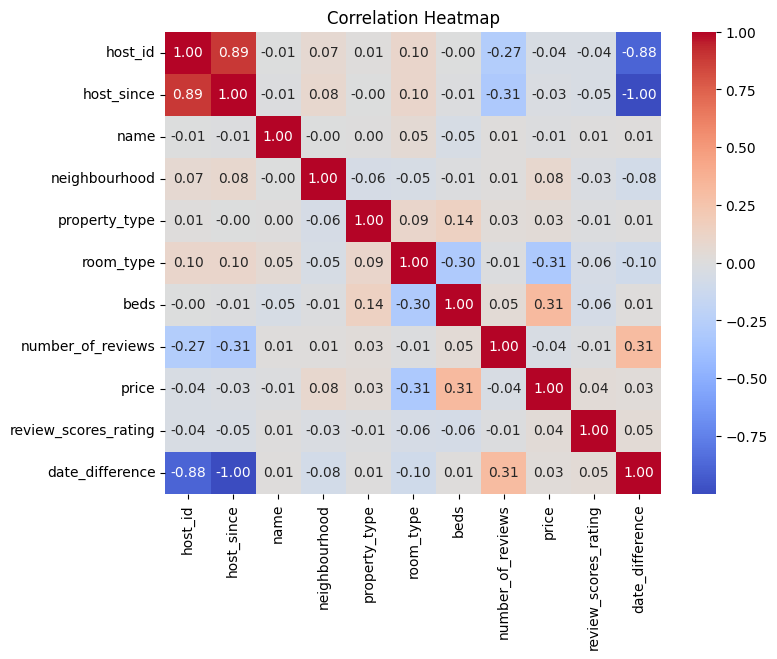

In [78]:
# correlation heatmap 

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Interpretation of correlation matrix

 The heatmap shows that room type and beds are factors that affect pricing with the beds having a moderate correlation of 0.31 co-efficient while the room type has a weak correlation of -0.31 co-efficient.